In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# **Data Preprocessing**

## **Importing dataset and the necessary libraries**

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

## **Data Exploration**

In [50]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
df.shape

(1338, 7)

In [52]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
print(df.select_dtypes(include='object'))  # Gives all the columns and rows containing catagorical data i.e., 'object'
print(df.select_dtypes(include='object').columns) # Provides you with the Columns names only
print(len(df.select_dtypes(include='object').columns))

         sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1338 rows x 3 columns]
Index(['sex', 'smoker', 'region'], dtype='object')
3


In [55]:
print(df.select_dtypes(include=['int','float']).columns)
print(len(df.select_dtypes(include=['int','float']).columns))

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
4


## **Statistical Analysis**

In [56]:
df.describe() # Gives info about numeric columns only

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Checking the counts of all catagorical columns through bar charts

In [57]:
 df.select_dtypes('object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

<Axes: xlabel='sex', ylabel='count'>

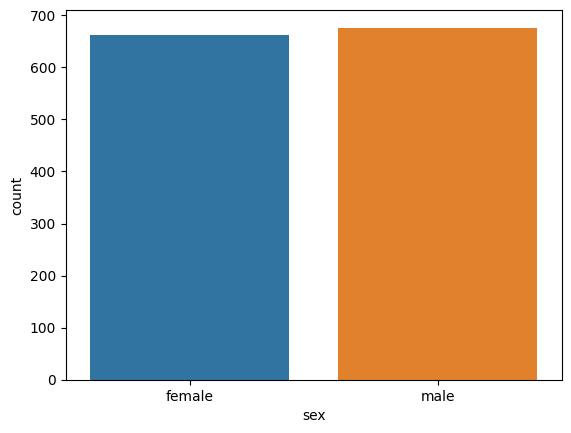

In [58]:
sns.countplot(x='sex', data = df)


<Axes: xlabel='smoker', ylabel='count'>

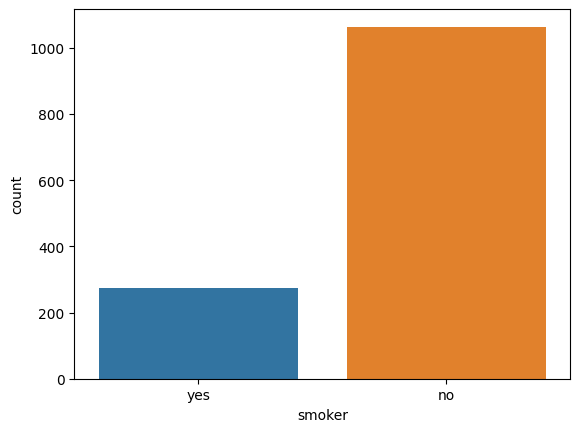

In [59]:
sns.countplot(x = 'smoker', data = df)


<Axes: xlabel='region', ylabel='count'>

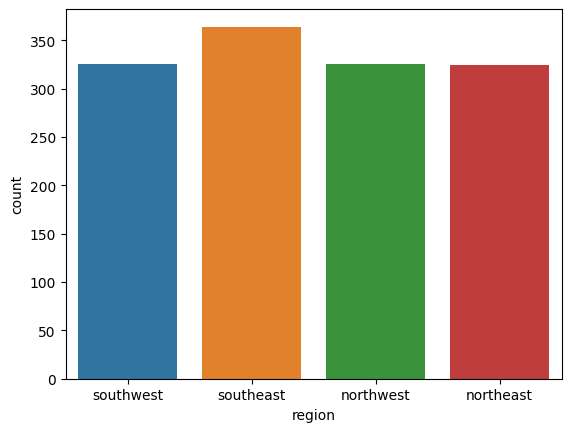

In [60]:
sns.countplot(x = 'region', data =df)

## Checking null values

In [61]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Encoding the catagorical variable**

In [62]:
  df.select_dtypes(exclude ='object').columns


Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [63]:
dataset = pd.get_dummies(data = df, drop_first = True, dtype=int)
dataset

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [64]:
dataset = dataset.rename(columns = {'sex_male':'sex'})

In [65]:
dataset.shape

(1338, 9)

## **Coorelation Matrix**

In [66]:
dataset_without_target = dataset.drop(columns = 'charges')
dataset_without_target

,age,bmi,children,sex,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


## 

<Axes: title={'center': 'Correlation'}>

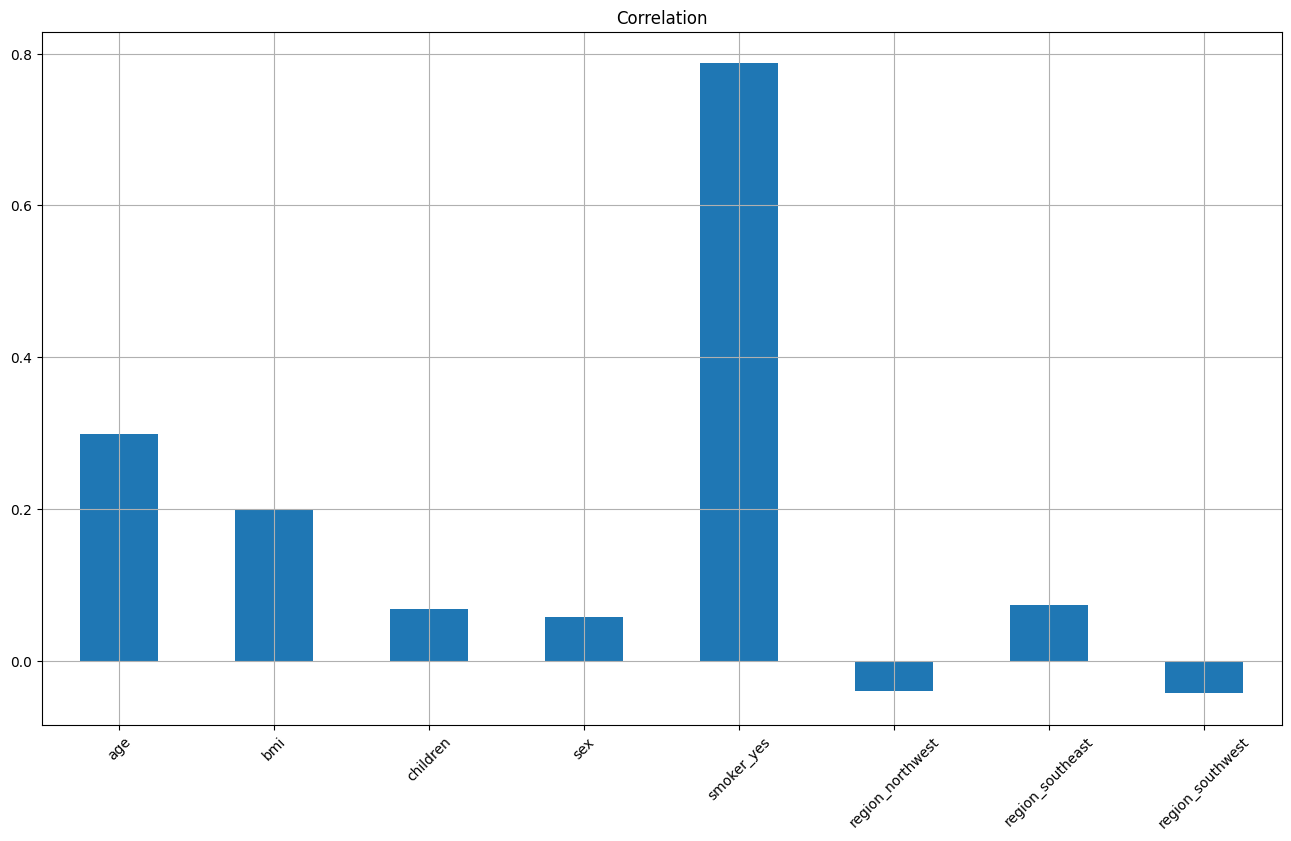

In [67]:
dataset_without_target.corrwith(dataset['charges']).plot.bar(
    figsize = (16,9), title = 'Correlation', rot = 45, grid = True)

***The Chart shows correlation of different columns with respect to charges which is an independent variable***

### Heat map of the correlation matrix

<Axes: >

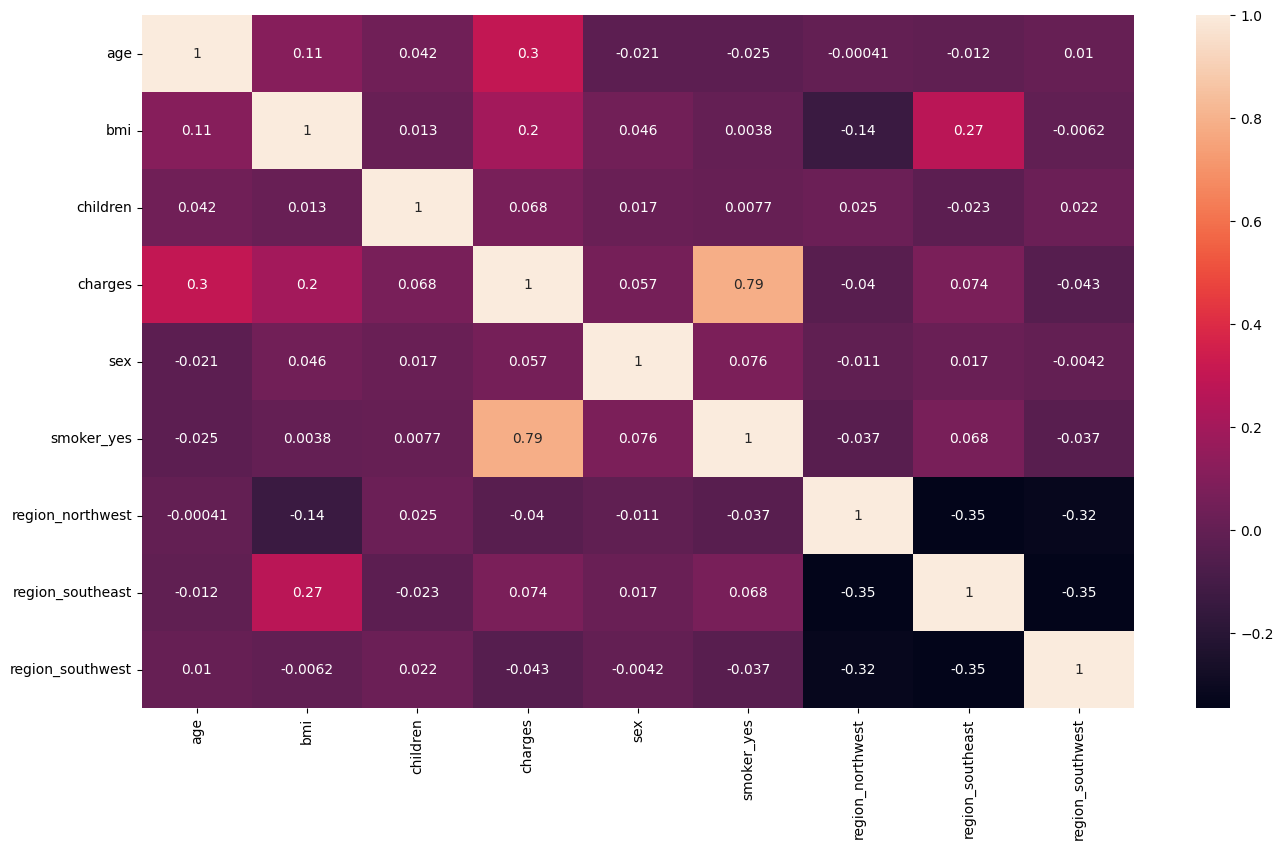

In [68]:
corr = dataset.corr()

plt.figure(figsize = (16,9))
sns.heatmap(corr, annot =True)

## Splitting the Dataset

In [69]:
dataset.shape

dataset.count()

age                 1338
bmi                 1338
children            1338
charges             1338
sex                 1338
smoker_yes          1338
region_northwest    1338
region_southeast    1338
region_southwest    1338
dtype: int64

In [70]:
# Independent variables 

x = dataset.drop(columns = 'charges')

#Independent variabe
y = dataset['charges']

print(x.head(5), y.head(5))

   age     bmi  children  sex  smoker_yes  region_northwest  region_southeast  \
0   19  27.900         0    0           1                 0                 0   
1   18  33.770         1    1           0                 0                 1   
2   28  33.000         3    1           0                 0                 1   
3   33  22.705         0    1           0                 1                 0   
4   32  28.880         0    1           0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0   0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [71]:
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', 200)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print(f" This is x train set:\n \n{x_train}\n \n, This is x test set:\n \n {x_test}\n \n,This is y train set:\n \n {y_train}\n \n,This is y test set:\n \n {y_test}" )

 This is x train set:
 
      age     bmi  children  sex  smoker_yes  region_northwest  \
1328   23  24.225         2    0           0                 0   
869    25  24.300         3    0           0                 0   
300    36  27.550         3    1           0                 0   
321    26  29.640         4    0           0                 0   
891    36  29.040         4    0           0                 0   
...   ...     ...       ...  ...         ...               ...   
603    64  39.050         3    0           0                 0   
659    57  28.785         4    0           0                 0   
1159   32  41.100         0    0           0                 0   
868    61  23.655         0    1           0                 0   
1113   28  26.315         3    0           0                 1   

      region_southeast  region_southwest  
1328                 0                 0  
869                  0                 1  
300                  0                 0  
321        

In [73]:
x_train.shape

(1070, 8)

In [74]:
x_test.shape

(268, 8)

In [75]:
y_train.shape

(1070,)

In [76]:
y_test.shape

(268,)

## Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [78]:
print(f"x_ train : {x_train},\n \n \n y_train:  {y_train}")

x_ train : [[-1.14958642 -1.06265477  0.78398619 ... -0.57806971 -0.60254238
  -0.55503915]
 [-1.0066479  -1.05020854  1.62961645 ... -0.57806971 -0.60254238
   1.80167471]
 [-0.22048601 -0.51087215  1.62961645 ... -0.57806971 -0.60254238
  -0.55503915]
 ...
 [-0.50636306  1.73774574 -0.90727434 ... -0.57806971 -0.60254238
   1.80167471]
 [ 1.56624554 -1.15724607 -0.90727434 ... -0.57806971 -0.60254238
  -0.55503915]
 [-0.79224011 -0.71581998  1.62961645 ...  1.72989517 -0.60254238
  -0.55503915]],
 
 
 y_train:  1328    22395.74424
869      4391.65200
300      6746.74250
321     24671.66334
891      7243.81360
           ...     
603     16085.12750
659     14394.39815
1159     3989.84100
868     13129.60345
1113     5312.16985
Name: charges, Length: 1070, dtype: float64


# **Buildin the Model** 

## **1. Multiple Linear Regression**

In [79]:
from sklearn.linear_model import LinearRegression # Libary for the Linear Regression 
from sklearn.metrics import r2_score

In [80]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [81]:
lr_y_pred = lr.predict(x_test)

In [82]:
r2_score(y_test,lr_y_pred)

0.7286303847453748

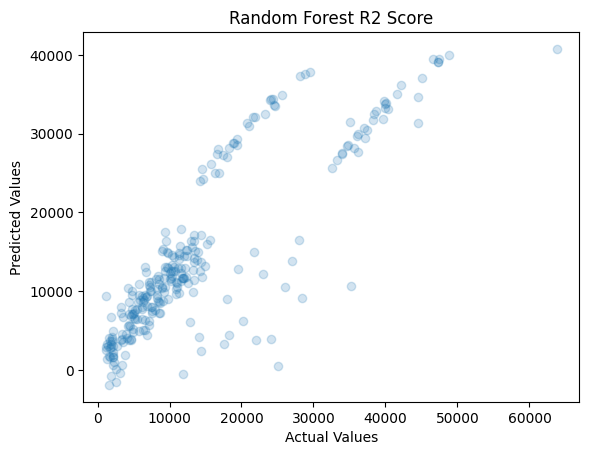

In [83]:
plt.scatter(y_test, lr_y_pred, alpha = 0.2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest R2 Score')
plt.show()

## 2. Random Forest 

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [85]:
rm = RandomForestRegressor()
rm.fit(x_train,y_train)

RandomForestRegressor()

In [86]:
rm_y_pred = rm.predict(x_test)

In [87]:
rm_r2_score = r2_score(y_test,rm_y_pred)
rm_r2_score

0.8477351725583021

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest R2 Score')
plt.show()

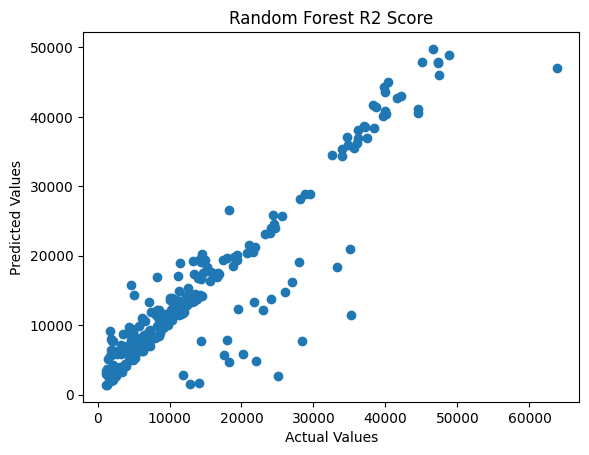

In [88]:
plt.scatter(y_test, rm_y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest R2 Score')
plt.show()